## HW7

휴먼지능정보공학과 201910803 박채희

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [20]:
from thinkdsp import read_wave

wave = read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

In [21]:
def autocorr(wave):
    """Computes and plots the autocorrelation function.

    wave: Wave
    """
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [22]:
def serial_corr(wave, lag=1):
    """Computes serial correlation with given lag.

    wave: Wave
    lag: integer, how much to shift the wave

    returns: float correlation coefficient
    """
    n = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:n-lag]
    corr_mat = np.corrcoef(y1, y2)
    return corr_mat[0, 1]

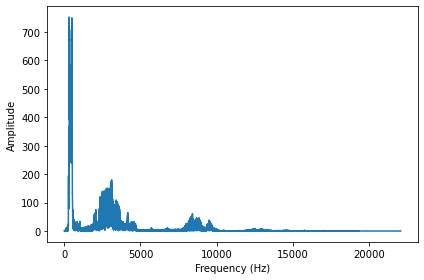

In [23]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

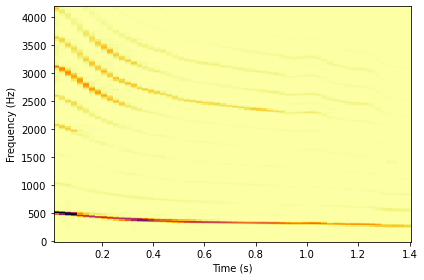

In [24]:
wave.make_spectrogram(2048).plot(high=4200)
decorate(xlabel='Time (s)', 
         ylabel='Frequency (Hz)')

1) frequency return 해주는 함수 : 가장 큰 peak를 찾고 그 peak의 index를 시간으로 바꿔준 다음, 그 시간을 초단위단위로 바꿔준다.

In [32]:
def estimate_fundamental(segment, low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

In [33]:
#실행결과 성공
duration = 0.01
segment = wave.segment(start=0.2, duration=duration)
freq = estimate_fundamental(segment)
freq

436.63366336633663

2) start와 end를 정해 wave의 segment 각각의 중심 time을 ts list에 append하고 그에 따른 frequency도 freqs list에 append한다.

In [39]:
step = 0.05
starts = np.arange(0.0, 1.4, step)

ts = []
freqs = []

for start in starts:
    ts.append(start + step/2)
    segment = wave.segment(start=start, duration=duration)
    freq = estimate_fundamental(segment)
    freqs.append(freq)

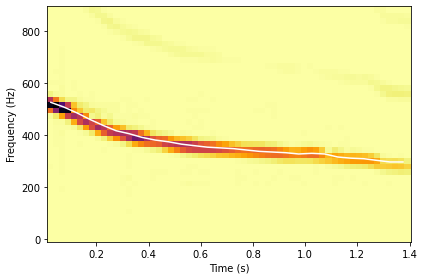

In [40]:
wave.make_spectrogram(2048).plot(high=900)
plt.plot( ts,freqs, color='white')
decorate(xlabel='Time (s)', 
                     ylabel='Frequency (Hz)')